In [272]:
# Import packages

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Import dataset 

In [5]:
fortune500=pd.read_csv('fortune500_1996_2023.csv')
fortune500.info()
fortune500.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27880 entries, 0 to 27879
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 27879 non-null  object 
 1   Rank                                 27880 non-null  int64  
 2   Industry                             27880 non-null  object 
 3   Headquarters_State                   27880 non-null  object 
 4   Revenues                             18880 non-null  object 
 5   year                                 27880 non-null  int64  
 6   Headquarters_City                    14994 non-null  object 
 7   Revenue_Percent_Change               10887 non-null  object 
 8   Profits                              1998 non-null   float64
 9   Profits_Percent_Change               9400 non-null   object 
 10  Assets                               1996 non-null   object 
 11  Total_Shareholder_Equity    

,Rank,year,Profits,profit_as _a_pct_ of_assets,profit_as_pct_of_shareholder_equity,Change_in_Rank,Change_in_Rank.1
count,27880.000000,27880.000000,1998.000000,997.000000,964.000000,6390.000000,3177.000000
mean,500.487877,2009.539885,1052.363413,43.945838,22.183921,5.325196,1.468996
std,288.630940,8.068908,3648.941886,60.130540,266.297884,62.934306,37.530329
min,1.000000,1996.000000,-12650.000000,-364.000000,-965.100000,-719.000000,-358.000000
25%,250.750000,2003.000000,102.850000,11.000000,7.200000,-17.000000,-12.000000
50%,500.500000,2010.000000,284.400000,37.000000,12.100000,2.000000,-1.000000
75%,750.000000,2017.000000,778.000000,72.000000,19.200000,26.000000,13.000000
max,1000.000000,2023.000000,83963.000000,334.000000,8100.000000,552.000000,295.000000


In [6]:
fortune500['Industry'].value_counts()

Utilities: Gas and Electric                 1343
Chemicals                                    993
Commercial Banks                             941
Specialty Retailers                          844
Insurance: Property and Casualty (Stock)     799
                                            ... 
Equipment Leasing                              9
X Brokerage                                    7
Marine services                                4
Oilfield Services                              4
Advertising, Marketing                         2
Name: Industry, Length: 106, dtype: int64

In [7]:
# Data Cleaning 

In [8]:
fort500=fortune500.drop(columns=['Total_Shareholder_Equity','Stockholders_Equity','Change_the_World',])

In [12]:
fortu500=fort500.fillna(0)

In [13]:
fortu500.isna().sum()

Name                                   0
Rank                                   0
Industry                               0
Headquarters_State                     0
Revenues                               0
year                                   0
Headquarters_City                      0
Revenue_Percent_Change                 0
Profits                                0
Profits_Percent_Change                 0
Assets                                 0
Market _Value _2013                    0
Profit_Percent_Sales                   0
Profit_Percent_Assets                  0
Profit_Percent_Shareholder_Equity      0
Total_Assets                           0
Market_Value_2014                      0
Sales                                  0
Profit_as_pct_of_sales                 0
profit_as _a_pct_ of_assets            0
profit_as_pct_of_shareholder_equity    0
gained_in_rank                         0
dropped_in_rank                        0
Newcomer                               0
Profitable      

In [14]:
fortu500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27880 entries, 0 to 27879
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 27880 non-null  object 
 1   Rank                                 27880 non-null  int64  
 2   Industry                             27880 non-null  object 
 3   Headquarters_State                   27880 non-null  object 
 4   Revenues                             27880 non-null  object 
 5   year                                 27880 non-null  int64  
 6   Headquarters_City                    27880 non-null  object 
 7   Revenue_Percent_Change               27880 non-null  object 
 8   Profits                              27880 non-null  float64
 9   Profits_Percent_Change               27880 non-null  object 
 10  Assets                               27880 non-null  object 
 11  Market _Value _2013         

In [15]:
# Finding only rows occuring in 2023

In [16]:
fortu_20_23=fortu500.loc[fortu500['year']==2023]

In [17]:
# Data Exploration/Analysis

In [18]:
fortu_indu=fortu_20_23[['Name','Industry','year']]
print(fortu_indu)

                             Name                                  Industry  \
26880                     Walmart                     General Merchandisers   
26881                      Amazon           Internet Services and Retailing   
26882                 Exxon Mobil                        Petroleum Refining   
26883                       Apple               Computers, Office Equipment   
26884          UnitedHealth Group   Health Care: Insurance and Managed Care   
...                           ...                                       ...   
27875               TTEC Holdings           Information Technology Services   
27876             ProFrac Holding           Oil and Gas Equipment, Services   
27877            Summit Materials                 Building Materials, Glass   
27878              Teladoc Health  Health Care: Pharmacy and Other Services   
27879  Alliance Resource Partners              Mining, Crude-Oil Production   

       year  
26880  2023  
26881  2023  
26882  20

In [19]:
industry=fortu_indu.groupby(['Industry'])['Name'].count()

In [20]:
industry.head()

Industry
Advertising, marketing             5
Aerospace & Defense               16
Airlines                          10
Apparel                           16
Automotive Retailing, Services    13
Name: Name, dtype: int64

In [21]:
# Fortune 500 Companies by Industry 2023

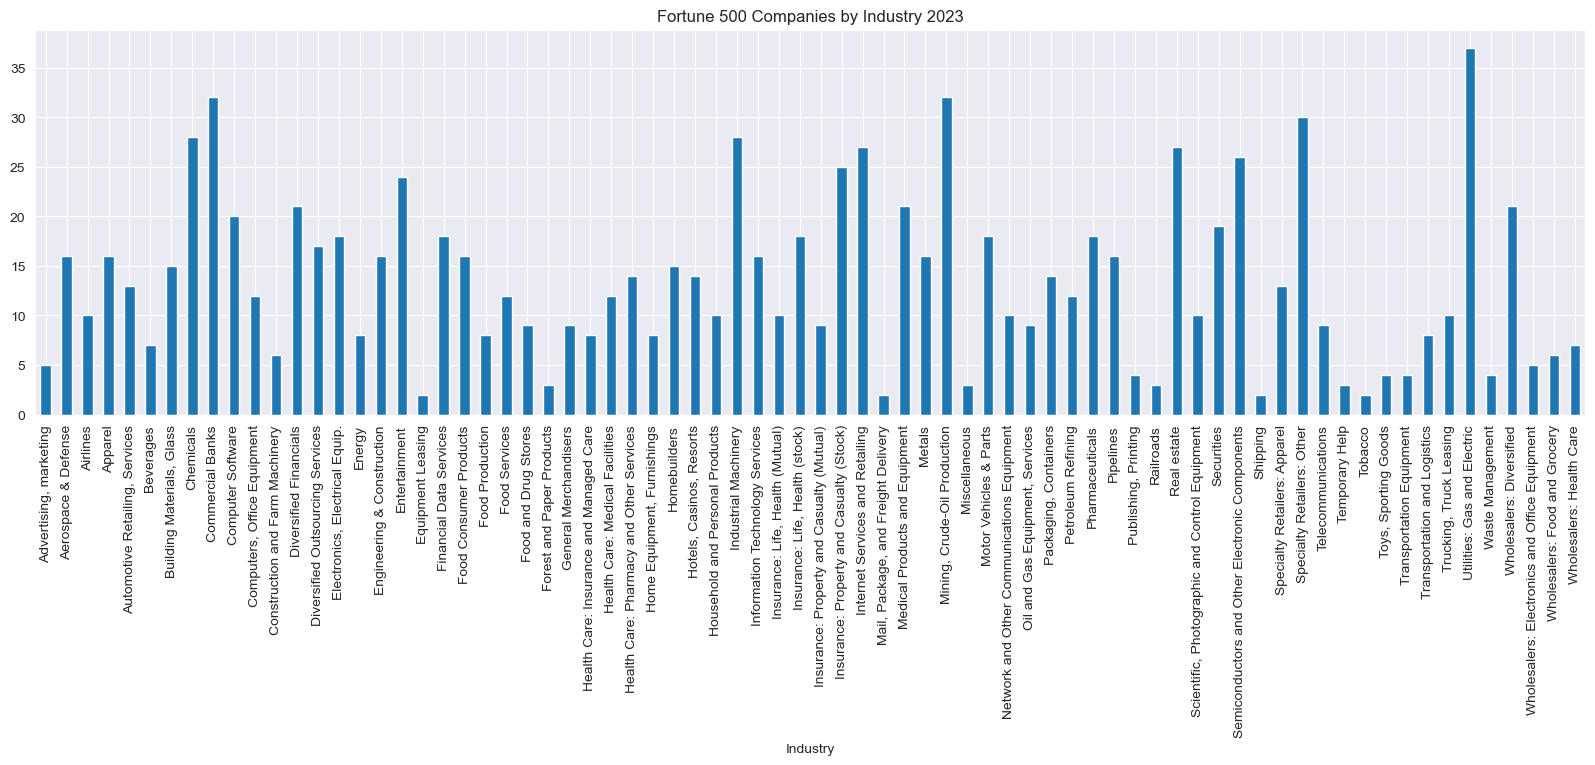

In [22]:
industry.plot(kind='bar', title='Fortune 500 Companies by Industry 2023')
plt.show()

In [23]:
# Identifying the Market Value By Industry and Top 10 MV23

In [24]:
mv23=fortu_20_23[['Name','Industry','Market_Value_2023']]

In [26]:
head_state=fortu_20_23[['Name','Headquarters_State']]
print(head_state)

                             Name Headquarters_State
26880                     Walmart                 AR
26881                      Amazon                 WA
26882                 Exxon Mobil                 TX
26883                       Apple                 CA
26884          UnitedHealth Group                 MN
...                           ...                ...
27875               TTEC Holdings                 CO
27876             ProFrac Holding                 TX
27877            Summit Materials                 CO
27878              Teladoc Health                 NY
27879  Alliance Resource Partners                 OK

[1000 rows x 2 columns]


In [27]:
state_count=head_state.groupby(['Headquarters_State'])['Name'].count()
print(state_count)

Headquarters_State
AL      3
AR      6
AZ     24
CA    123
CO     26
CT     28
DC      5
DE      7
FL     39
GA     35
HI      3
IA      2
ID      4
IL     59
IN     19
KS      4
KY      6
LA      3
MA     31
MD     10
ME      1
MI     29
MN     26
MO     19
NC     30
ND      1
NE      7
NH      2
NJ     24
NV     10
NY     82
OH     54
OK     10
OR      6
PA     42
PR      1
RI      7
SC      3
SD      1
TN     23
TX    109
UT      3
VA     36
WA     17
WI     20
Name: Name, dtype: int64


In [28]:
# Number of Fortune 500 companies by State 2023 

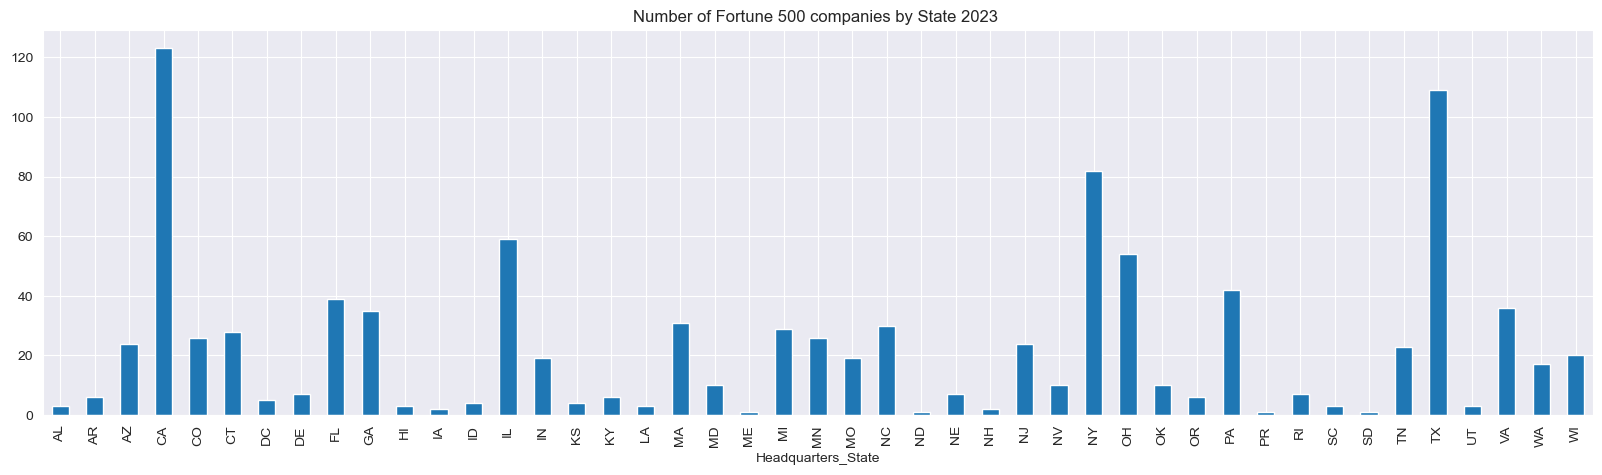

In [29]:
state_count.plot(kind='bar', title='Number of Fortune 500 companies by State 2023 ')
plt.show()

In [30]:
# Will turn into a graph in Tableau to sort the mix between the strings and intergers

In [31]:
rev23=fortu_20_23[['Name','Industry','Revenue_Percent_Change']]
print(rev23)

                             Name                                  Industry  \
26880                     Walmart                     General Merchandisers   
26881                      Amazon           Internet Services and Retailing   
26882                 Exxon Mobil                        Petroleum Refining   
26883                       Apple               Computers, Office Equipment   
26884          UnitedHealth Group   Health Care: Insurance and Managed Care   
...                           ...                                       ...   
27875               TTEC Holdings           Information Technology Services   
27876             ProFrac Holding           Oil and Gas Equipment, Services   
27877            Summit Materials                 Building Materials, Glass   
27878              Teladoc Health  Health Care: Pharmacy and Other Services   
27879  Alliance Resource Partners              Mining, Crude-Oil Production   

      Revenue_Percent_Change  
26880               

In [32]:
mv18_23=fortu_20_23[['Name','Industry','Market_Value_2023']]

In [33]:
print(mv18_23)

                             Name                                  Industry  \
26880                     Walmart                     General Merchandisers   
26881                      Amazon           Internet Services and Retailing   
26882                 Exxon Mobil                        Petroleum Refining   
26883                       Apple               Computers, Office Equipment   
26884          UnitedHealth Group   Health Care: Insurance and Managed Care   
...                           ...                                       ...   
27875               TTEC Holdings           Information Technology Services   
27876             ProFrac Holding           Oil and Gas Equipment, Services   
27877            Summit Materials                 Building Materials, Glass   
27878              Teladoc Health  Health Care: Pharmacy and Other Services   
27879  Alliance Resource Partners              Mining, Crude-Oil Production   

      Market_Value_2023  
26880         $397,475   

In [34]:
mvt=mv18_23.groupby(['Industry'])['Market_Value_2023'].count()


<Axes: title={'center': '2023 Market Value By Industry'}, xlabel='Industry'>

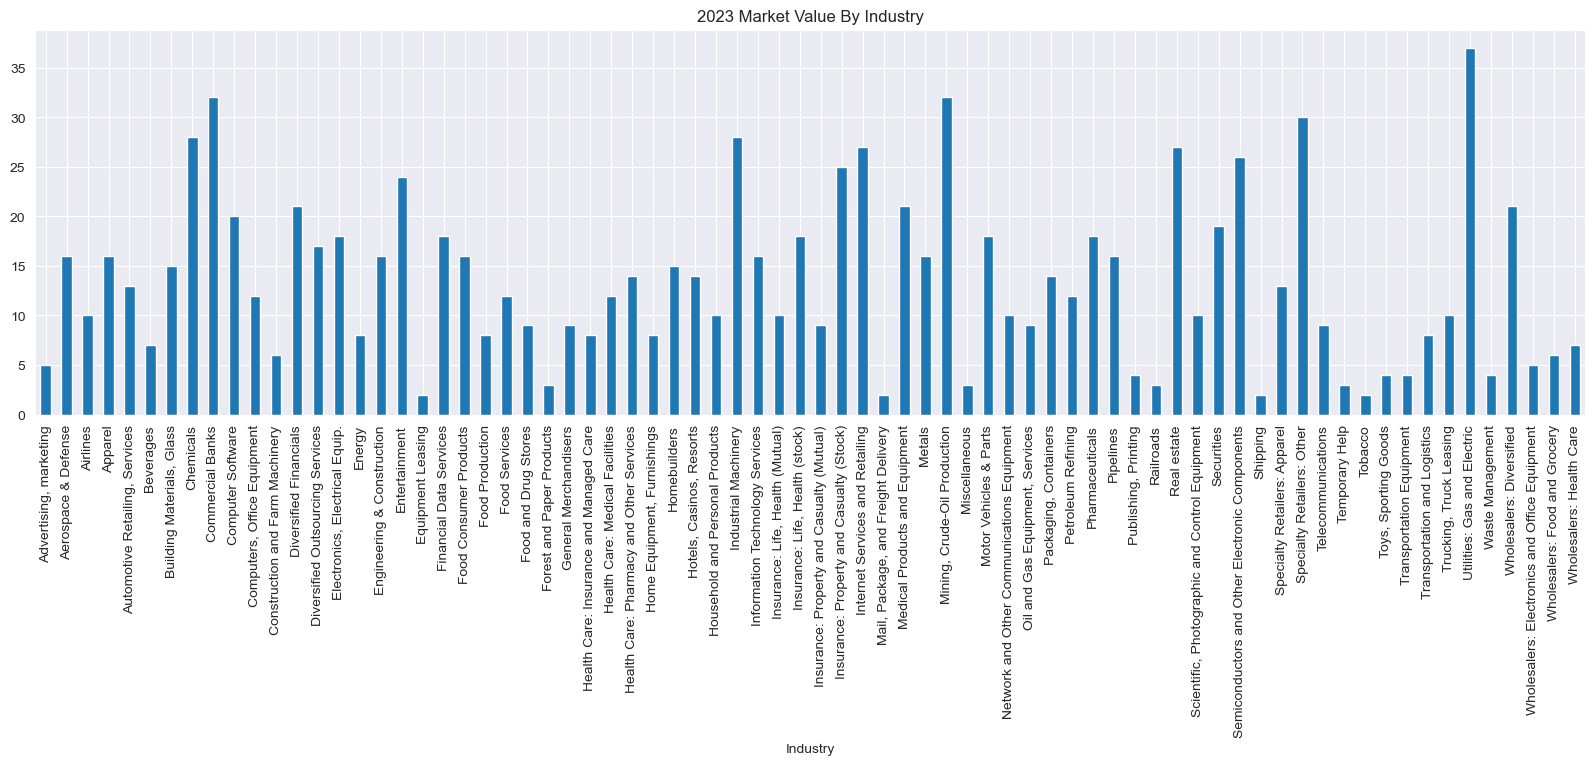

In [35]:
mvt.plot(kind='bar', title='2023 Market Value By Industry')